In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',header=None,sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']







In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


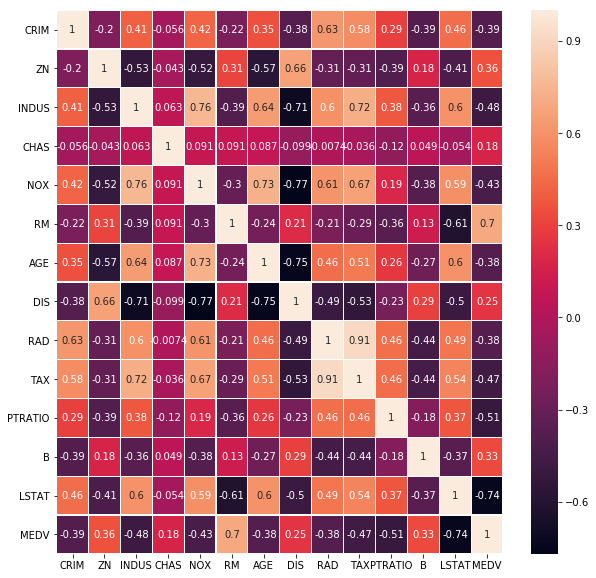

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr, annot=True,linewidths=0.1, ax = ax)

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


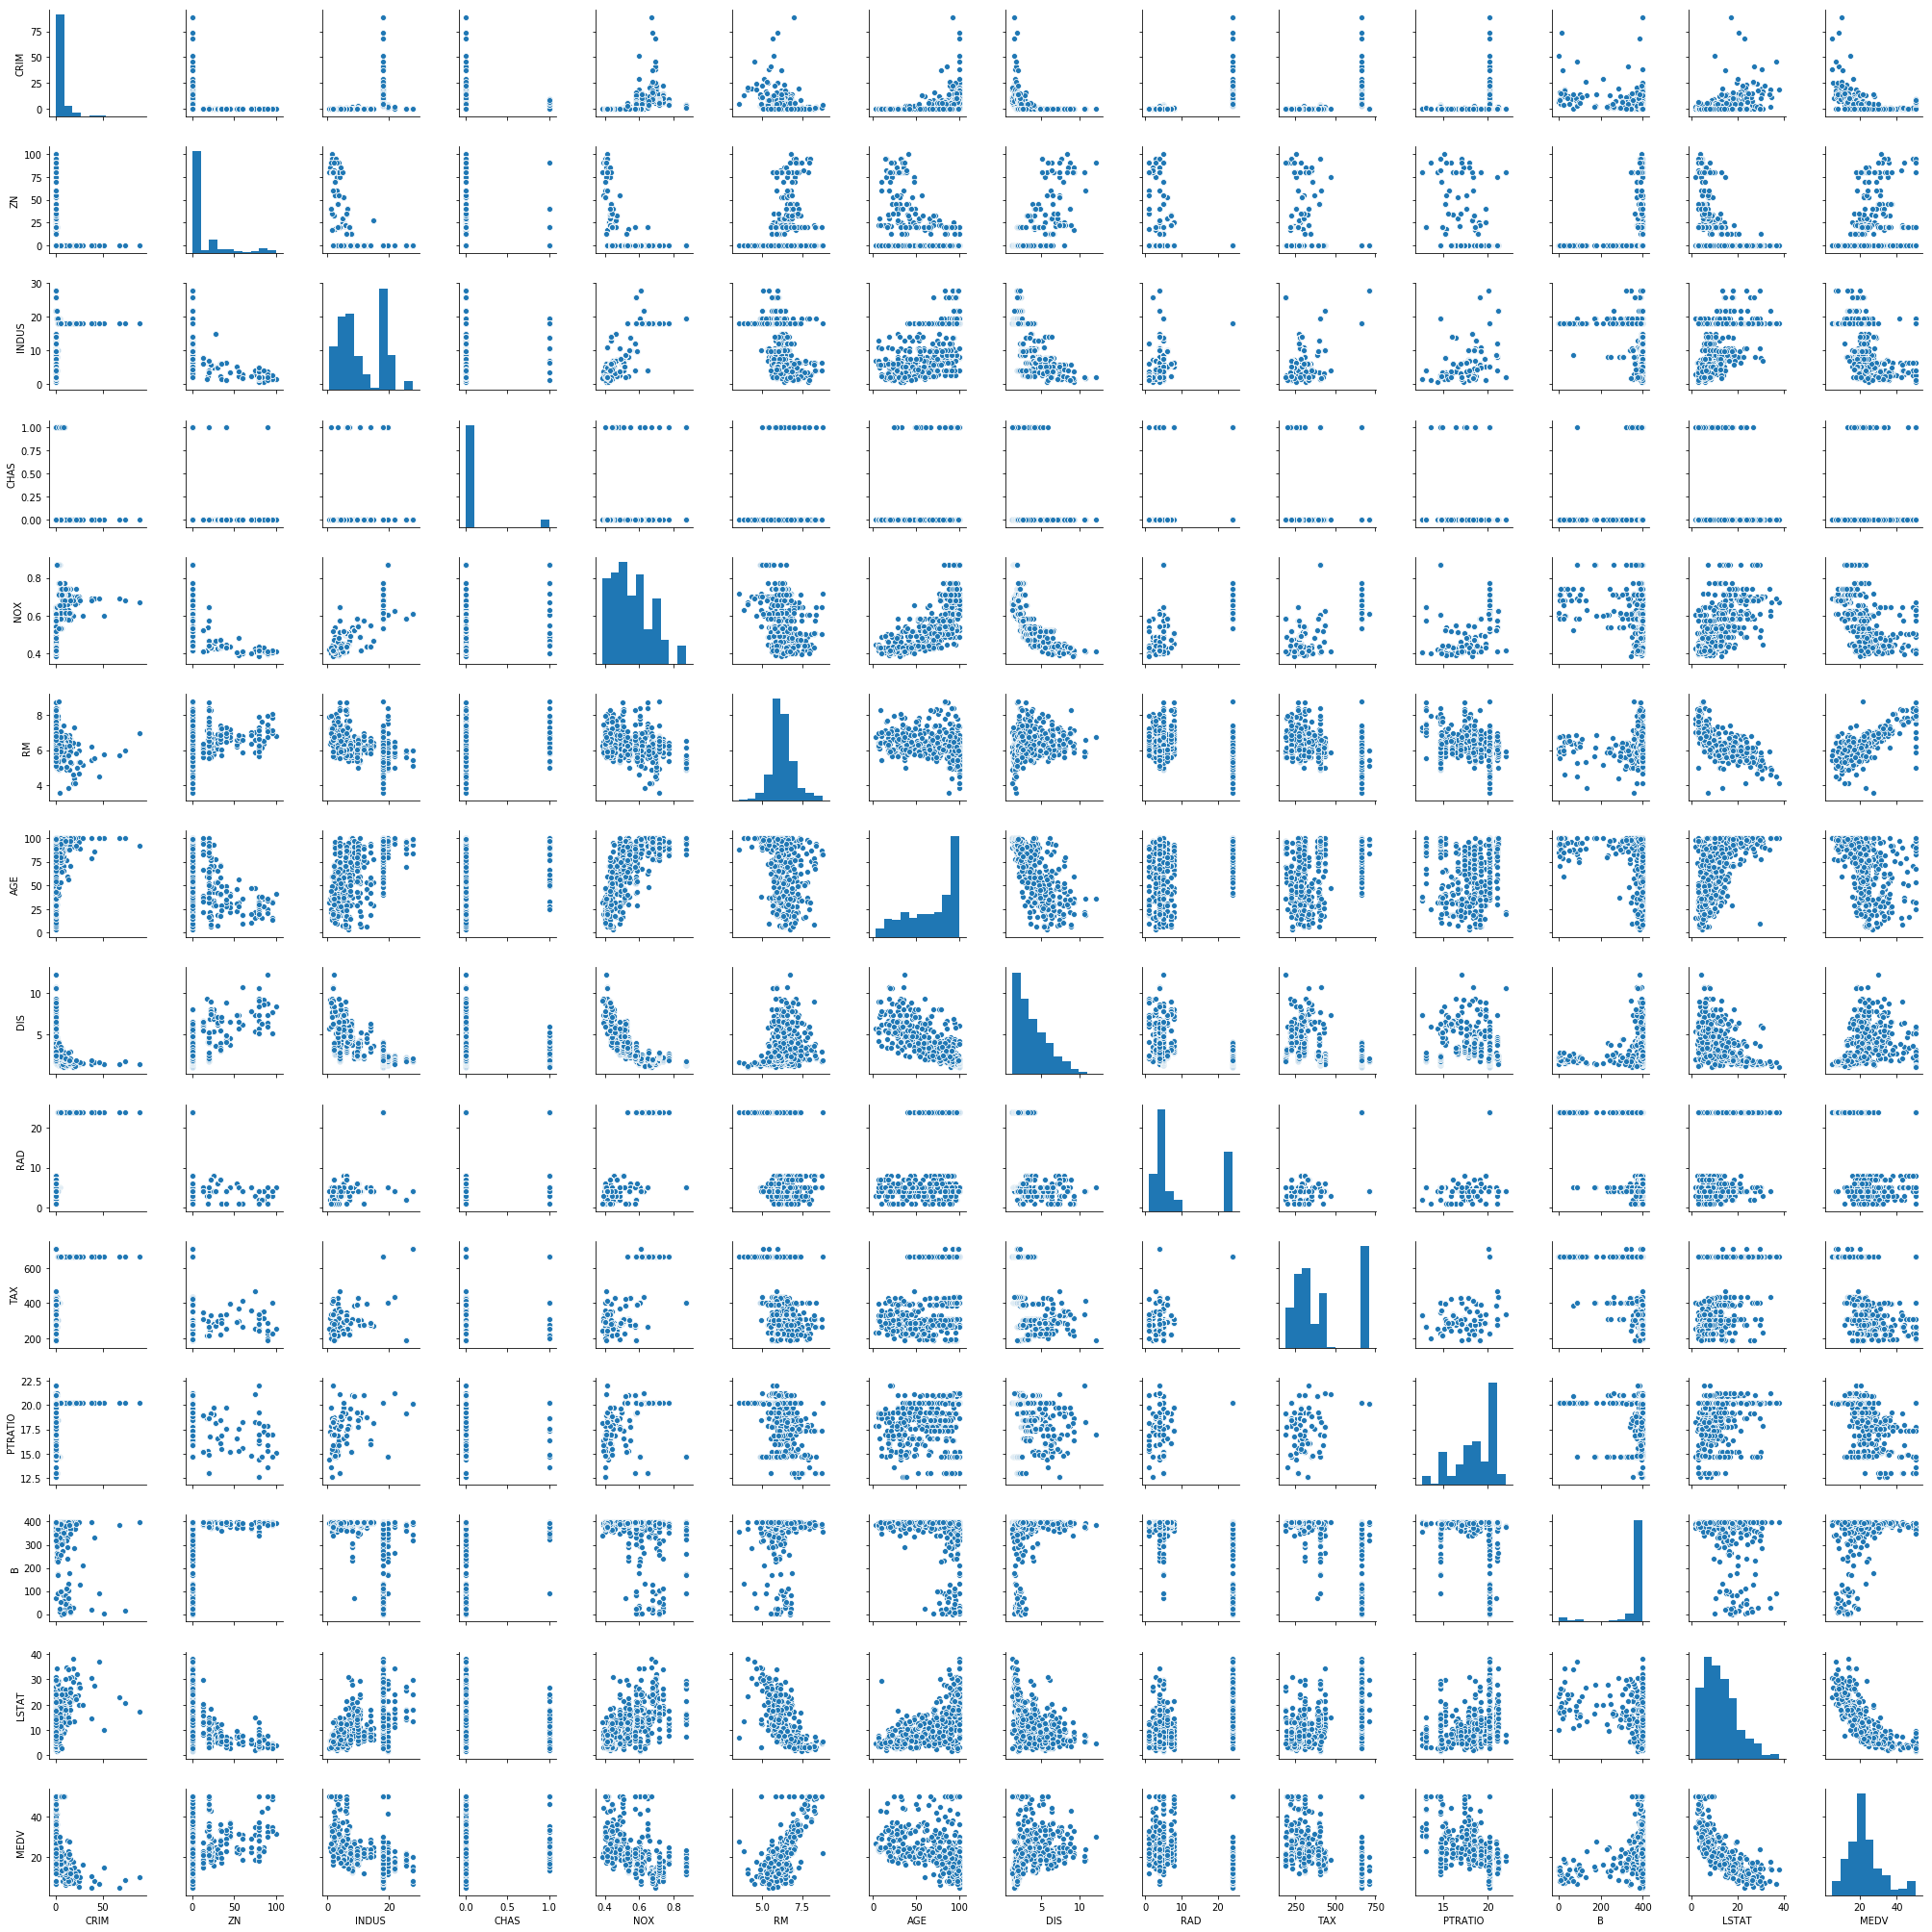

In [5]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], size=2)
plt.tight_layout()
plt.show()

In [10]:
df2 = pd.read_csv('housing2.csv', header=0)
df2.dropna(inplace=True)
df2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Linear Regression

In [12]:
X = df2[df2.columns[:-1]]
y = df2["MEDV"]


In [13]:
train_x, test_x, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
sc = StandardScaler()
sc.fit(train_x)
X_train_std = sc.transform(train_x)
X_test_std = sc.transform(test_x)

print(X_train_std.shape)
print(X_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(361, 26)
(91, 26)
(361,)
(91,)


In [15]:
slr = LinearRegression()
fit=slr.fit(X_train_std, y_train)
print("coefficient: ", slr.coef_)
print("intercept: ", slr.intercept_)



print('R2 training: ', slr.score(X_train_std, y_train))
print('MSE training: ', mean_squared_error(slr.predict(X_train_std), y_train))
print('R2 testing : ', slr.score(X_test_std, y_test))
print('MSE testing : ', mean_squared_error(slr.predict(X_test_std), y_test))

coefficient:  [ 6.36878258e-01 -8.80800117e-02  2.50145305e-01 -3.47528161e-03
 -8.45940464e-02 -2.34404053e-01 -3.38209259e-02 -2.23346672e-01
 -1.33484470e-01 -2.51521110e-01 -3.76748360e-01  3.34629218e-01
 -4.72357790e-02 -4.78393874e-01  7.67080415e-01  3.43980336e-01
  4.95866507e-01 -1.42173379e+00  3.76577552e+00 -6.44302821e-01
 -2.89568308e+00  1.90480739e+00 -1.49260936e+00 -1.92347223e+00
  9.33146703e-01 -2.88167784e+00]
intercept:  23.91191135734072
R2 training:  0.759485972241301
MSE training:  19.076839001549022
R2 testing :  0.6782810596985454
MSE testing :  22.320863963140166


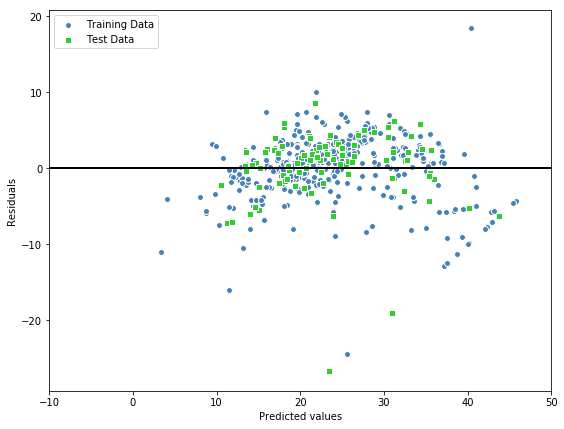

In [16]:
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)
rs_train = y_train_pred - y_train
rs_test=y_test_pred - y_test
plt.figure(figsize=(9,7))

plt.scatter(y_train_pred, rs_train, c='steelblue', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred, rs_test, c='limegreen', marker='s', edgecolor='white', label='Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()


In [17]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))


MSE train: 19.077, test: 22.321


In [18]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

R^2 train: 0.759, test: 0.678


## Ridge

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge = Ridge(alpha=1.0)

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [23]:
min_mse = 100
mse_list_ridge = []

for a in np.arange(0,50,0.01):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_std, y_train)
    y_pred = ridge.predict(X_test_std)
    mse_score_ridge = mean_squared_error(y_pred, y_test)
    mse_list_ridge.append(mse_score_ridge) 
    
    
    
    
    if mse_score_ridge < min_mse:
        best_alpha = a
        min_mse = mse_score_ridge
        coef = ridge.coef_
        intercept = ridge.intercept_
        train_R2 = ridge.score(X_train_std, y_train)
        test_R2 = ridge.score(X_test_std, y_test)
        train_mse = mse_score_ridge

print('Lowest MSE score is ', min_mse)
print('Best Alpha is ', best_alpha)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 for training data: ', train_R2)
print('MSE for training data: ', train_mse)
print('R2 for testing data : ', test_R2)

Lowest MSE score is  22.172878411916574
Best Alpha is  20.14
coefficient:  [ 5.80762098e-01 -1.24376295e-01  2.27353186e-01 -4.67710870e-02
 -9.11949541e-02 -2.08781978e-01  3.05043620e-03 -2.09269483e-01
 -1.20303829e-01 -2.32095834e-01 -3.49295483e-01  3.15312064e-01
 -5.26781258e-02 -2.06655555e-01  5.73276224e-01  2.91161693e-02
  5.38852780e-01 -1.06130421e+00  3.66767711e+00 -5.42290550e-01
 -2.40144999e+00  1.12414955e+00 -9.59657609e-01 -1.80758939e+00
  9.19783796e-01 -2.84924624e+00]
intercept:  23.91191135734072
R2 for training data:  0.75674191880586
MSE for training data:  22.172878411916574
R2 for testing data :  0.6804140306623128


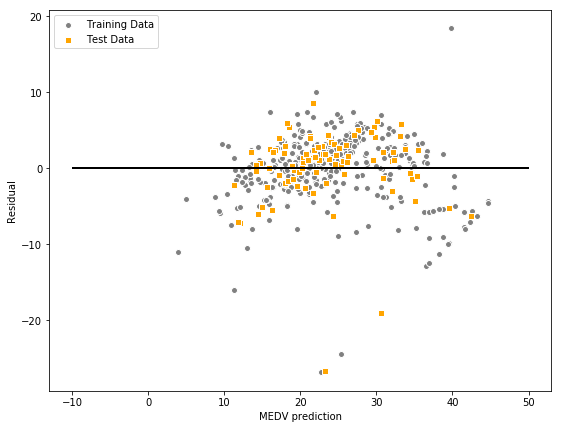

In [24]:
ridge_alpha = Ridge(alpha=best_alpha)
ridge_alpha.fit(X_train_std, y_train)

y_train_pred_ridge = ridge_alpha.predict(X_train_std)
y_test_pred_ridge = ridge_alpha.predict(X_test_std)

rs_train = y_train_pred - y_train
rs_test = y_test_pred - y_test
plt.figure(figsize=(9,7))
plt.scatter(y_train_pred_ridge, rs_train, c='gray', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_ridge, rs_test, c='orange', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("MEDV prediction")
plt.ylabel("Residual")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

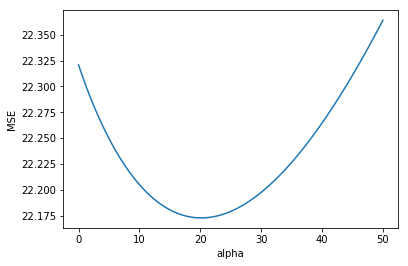

In [25]:
plt.plot(np.arange(0,50,0.01), mse_list_ridge)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

## LASSO

In [26]:
min_mse_lasso = 1000
mse_list_lasso = []

for a in np.arange(0,50,0.01):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_std, y_train)
    y_pred_lasso = lasso.predict(X_test_std)
    mse_score_lasso = mean_squared_error(y_pred_lasso, y_test)
    mse_list_lasso.append(mse_score_lasso) 
    
    
    
    
    if mse_score_lasso < min_mse_lasso:
        best_alpha_lasso = a
        min_mse_lasso = mse_score_lasso
        coef = lasso.coef_
        intercept = lasso.intercept_
        train_R2_lasso = lasso.score(X_train_std, y_train)
        test_R2_lasso = lasso.score(X_test_std, y_test)
        train_mse_lasso = mse_score_lasso

print('Lowest test MSE is ', min_mse_lasso)
print('Best Alpha is ', best_alpha_lasso)
print('coefficient: ', coef)
print('intercept: ', intercept)
print('R2 training: ', train_R2_lasso)
print('MSE training: ', train_mse_lasso)
print('R2 testing: ', test_R2_lasso)

/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3443.369439779596, tolerance: 2.8633418781163438
  positive)


Lowest test MSE is  22.259925959464294
Best Alpha is  0.02
coefficient:  [ 0.61563549 -0.07332917  0.22814233 -0.         -0.07101455 -0.20728528
 -0.         -0.20152123 -0.10311897 -0.22848783 -0.35722077  0.31247513
 -0.04139319 -0.2672567   0.67511661  0.16832147  0.49668051 -1.33192057
  3.76073859 -0.59419986 -2.7841839   1.51334765 -1.23868174 -1.88785359
  0.93013782 -2.91740703]
intercept:  23.91191135734072
R2 training:  0.7590791405127028
MSE training:  22.259925959464294
R2 testing:  0.6791593818817306


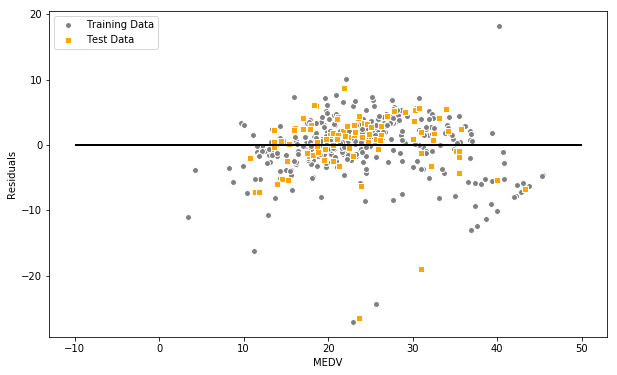

In [27]:
lasso_alpha = Lasso(alpha=best_alpha_lasso)
lasso_alpha.fit(X_train_std, y_train)

y_train_pred_lasso = lasso_alpha.predict(X_train_std)
y_test_pred_lasso = lasso_alpha.predict(X_test_std)

rs_train_lasso = y_train_pred_lasso - y_train
rs_test_lasso = y_test_pred_lasso - y_test
plt.figure(figsize=(10,6))
plt.scatter(y_train_pred_lasso, rs_train_lasso, c='gray', marker='o', edgecolor='white', label='Training Data')
plt.scatter(y_test_pred_lasso, rs_test_lasso, c='orange', marker='s', edgecolor='white', label='Test Data')
plt.xlabel("MEDV")
plt.ylabel("Residuals")
plt.hlines(y=0,xmin=-10,xmax=50, color='black',lw=2)
plt.legend(loc='upper left')
plt.show()

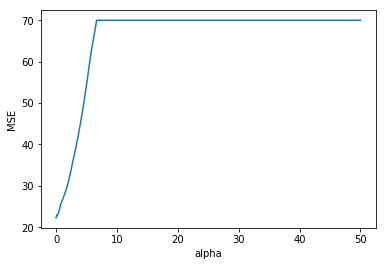

In [28]:
plt.plot(np.arange(0,50,0.01), mse_list_lasso)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [29]:
print("My name is {Zhuoyuan Zhang}")
print("My NetID is: {zz10}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zhuoyuan Zhang}
My NetID is: {zz10}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
